### Analysis the syzygy moments of Sun, Earth, and Moon
* Note that in the context of Chinese calendar, syzygy means "朔望", which can be defined as: the apparent longitudes of Sun and Moon are equal.

In [1]:
import common
from datetime import date, datetime, timedelta

# Generate the data for every day starting from 2000-01-01.
FIRST_DATE = datetime(2000, 1, 1)
datetimes = [FIRST_DATE + timedelta(hours=i) for i in range(0, 365 * 10 * 24)]

# Compute the sun longitude for each date. 
# Simply assume `fraction` is 0.0 (which means we are calculating the longitude of the moment 00:00:00 of the date).
jdes = [common.ut1_to_jde(dt.year, dt.month, dt.day, dt.hour / 24) for dt in datetimes]

sun_coords = [common.sun_apparent_geocentric_coord(jde) for jde in jdes]
sun_longitudes = [sun_coord.lon for sun_coord in sun_coords]

moon_coords = [common.moon_apparent_geocentric_coord(jde) for jde in jdes]
moon_longitudes = [coord.lon for coord in moon_coords]

In [2]:
# Put the data into a dataframe.
assert len(datetimes) == len(sun_longitudes)

import pandas as pd
sun_df = pd.DataFrame({
  'datetime': datetimes,
  'sun_longitude': sun_longitudes
})

sun_df['datetime'] = pd.to_datetime(sun_df['datetime'])

sun_df

,datetime,sun_longitude
0,2000-01-01 00:00:00,279.859210
1,2000-01-01 01:00:00,279.901685
2,2000-01-01 02:00:00,279.944159
3,2000-01-01 03:00:00,279.986634
4,2000-01-01 04:00:00,280.029109
...,...,...
87595,2009-12-28 19:00:00,277.182511
87596,2009-12-28 20:00:00,277.224960
87597,2009-12-28 21:00:00,277.267409
87598,2009-12-28 22:00:00,277.309857


In [3]:
max_sun_longitude = sun_df['sun_longitude'].max()
min_sun_longitude = sun_df['sun_longitude'].min()

# Display the results
print(f"Maximum sun longitude: {max_sun_longitude}")
print(f"Minimum sun longitude: {min_sun_longitude}")

Maximum sun longitude: 359.99488263681747
Minimum sun longitude: 0.000159441179882913


In [4]:
# Put the data into a dataframe.
assert len(datetimes) == len(moon_longitudes)

import pandas as pd
moon_df = pd.DataFrame({
  'datetime': datetimes,
  'moon_longitude': moon_longitudes
})

moon_df['datetime'] = pd.to_datetime(moon_df['datetime'])

moon_df

,datetime,moon_longitude
0,2000-01-01 00:00:00,217.293393
1,2000-01-01 01:00:00,217.797526
2,2000-01-01 02:00:00,218.301351
3,2000-01-01 03:00:00,218.804874
4,2000-01-01 04:00:00,219.308099
...,...,...
87595,2009-12-28 19:00:00,56.350123
87596,2009-12-28 20:00:00,56.934738
87597,2009-12-28 21:00:00,57.520122
87598,2009-12-28 22:00:00,58.106275


In [5]:
# Calculate the maximum and minimum values of moon_longitude
max_moon_longitude = moon_df['moon_longitude'].max()
min_moon_longitude = moon_df['moon_longitude'].min()

# Display the results
print(f"Maximum moon longitude: {max_moon_longitude}")
print(f"Minimum moon longitude: {min_moon_longitude}")

Maximum moon longitude: 359.9982359328965
Minimum moon longitude: 0.002168627084245145


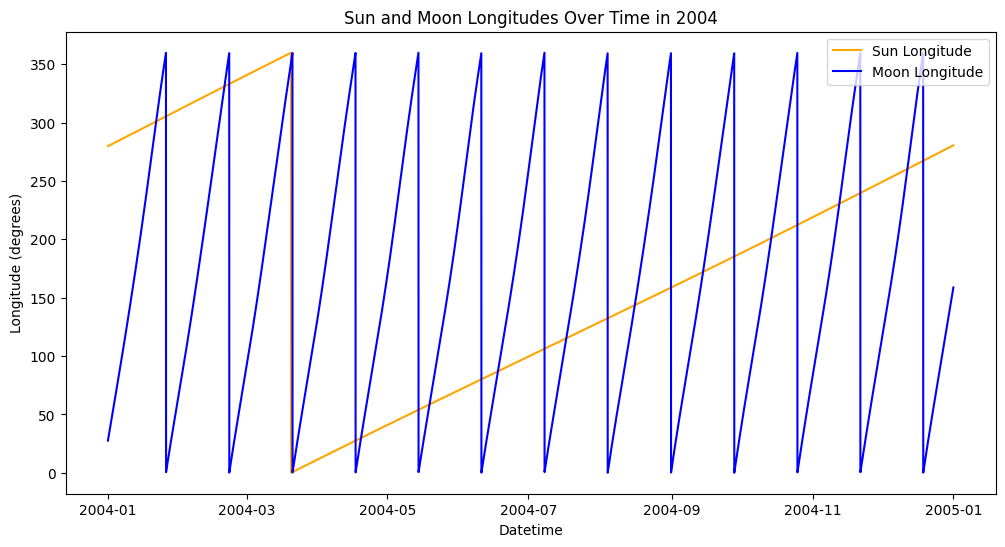

In [6]:
import matplotlib.pyplot as plt

# Filter for the year 2004
sun_df_2004 = sun_df[sun_df['datetime'].dt.year == 2004]
moon_df_2004 = moon_df[moon_df['datetime'].dt.year == 2004]

# Plotting for the year 2004
plt.figure(figsize=(12, 6))

# Plot sun longitudes for 2004
plt.plot(sun_df_2004['datetime'], sun_df_2004['sun_longitude'], label='Sun Longitude', color='orange')

# Plot moon longitudes for 2004
plt.plot(moon_df_2004['datetime'], moon_df_2004['moon_longitude'], label='Moon Longitude', color='blue')

# Adding labels and title
plt.xlabel('Datetime')
plt.ylabel('Longitude (degrees)')
plt.title('Sun and Moon Longitudes Over Time in 2004')
plt.legend()

# Display the plot
plt.show()

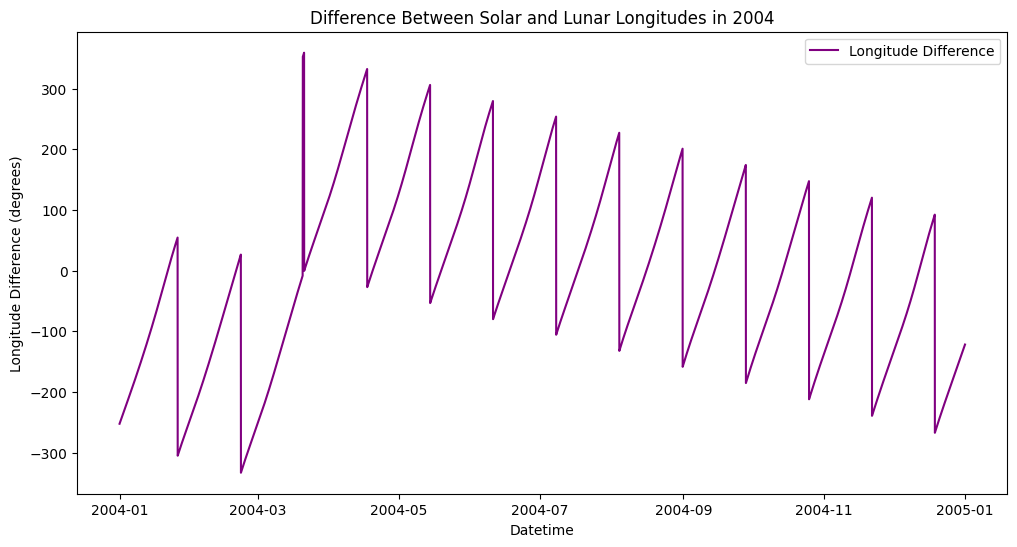

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# Merge the two DataFrames on the datetime column
merged_df_2004 = pd.merge(sun_df_2004, moon_df_2004, on='datetime', suffixes=('_sun', '_moon'))

# Calculate the difference between sun and moon longitudes
merged_df_2004['longitude_difference'] = merged_df_2004['moon_longitude'] - merged_df_2004['sun_longitude']

# Plotting the difference
plt.figure(figsize=(12, 6))
plt.plot(merged_df_2004['datetime'], merged_df_2004['longitude_difference'], label='Longitude Difference', color='purple')

# Adding labels and title
plt.xlabel('Datetime')
plt.ylabel('Longitude Difference (degrees)')
plt.title('Difference Between Solar and Lunar Longitudes in 2004')
plt.legend()

# Display the plot
plt.show()

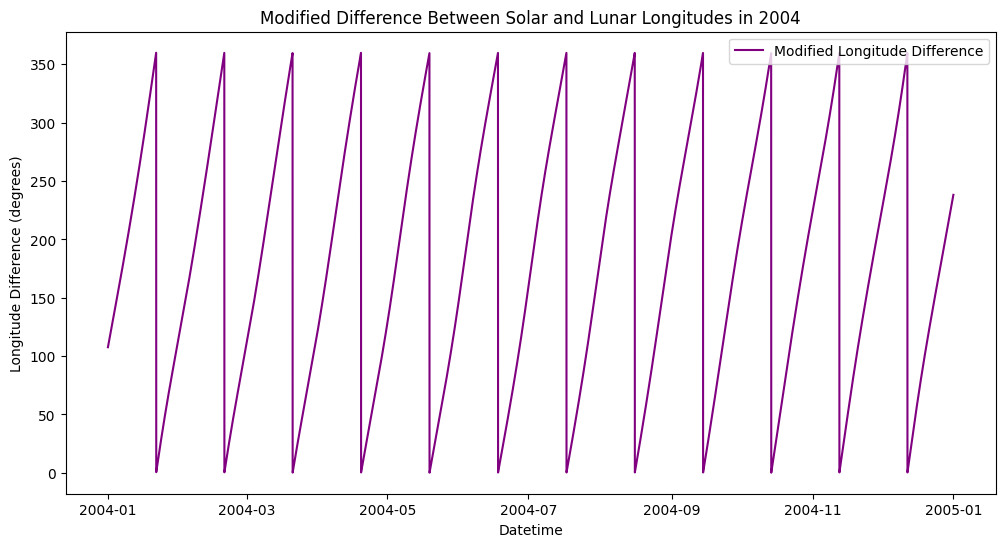

In [8]:
# Calculate the difference between sun and moon longitudes
merged_df_2004['longitude_difference'] = merged_df_2004['moon_longitude'] - merged_df_2004['sun_longitude']

# Define the function
def modify_diff(diff):
  diff = diff % 360.0
  return diff

# Apply the function to the longitude difference
merged_df_2004['modified_longitude_difference'] = merged_df_2004['longitude_difference'].apply(modify_diff)

# Plotting the modified difference
plt.figure(figsize=(12, 6))
plt.plot(merged_df_2004['datetime'], merged_df_2004['modified_longitude_difference'], label='Modified Longitude Difference', color='purple')

# Adding labels and title
plt.xlabel('Datetime')
plt.ylabel('Longitude Difference (degrees)')
plt.title('Modified Difference Between Solar and Lunar Longitudes in 2004')
plt.legend()

# Display the plot
plt.show()